**Download** (right-click, save target as ...) this page as a jupyterlab notebook from: [Lab12](http://54.243.252.9/engr-1330-webroot/8-Labs/Lab12/Lab12.ipynb)

___

# <font color=darkred>Laboratory 12: Practice with Pandas </font>

***Medrano, Giovanni**

**R11521018**

ENGR 1330 Laboratory 12 - In-Lab

## Exercise 1
Profile your computer

Run the script below exactly as written

In [1]:
import sys
! hostname
! whoami
print(sys.executable)

DESKTOP-6HAS1BN
desktop-6has1bn\medraC:\Users\medra\anaconda3\python.exe



---

## Example

Population Lines

Use pandas to read a dataframe from the file [http://54.243.252.9/engr-1330-webroot/4-Databases/census_18.csv](http://54.243.252.9/engr-1330-webroot/4-Databases/census_18.csv).  
Then produce a line plot of the counts by age for the 2010 census, x-axis will be the series `age`, y-axis will be the census values for `2010`.

In [2]:
# get the file (using requests, or just download to your computer by hand)
import requests # Module to process http/https requests
#
remote_url="http://54.243.252.9/engr-1330-webroot/4-Databases/census_18.csv"  # set the url
rget = requests.get(remote_url, allow_redirects=True)  # get the remote resource, follow imbedded links
#
junk = open('census_18.csv','wb').write(rget.content) # extract from the remote the contents, assign to a local file same name

In [3]:
# read the file into a dataframe
import pandas as pd
df = pd.read_csv('census_18.csv')
df.head() # Examine dataframe layout

,AGE,2010,2014
0,0,3951330,3949775
1,1,3957888,3949776
2,2,4090862,3959664
3,3,4111920,4007079
4,4,4077551,4005716


<AxesSubplot:xlabel='AGE'>

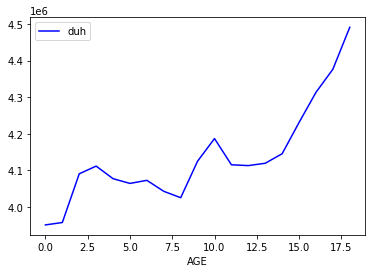

In [4]:
# plotting 
df.plot.line(x="AGE", y="2010", label="duh", c="blue")# Make a plot fill in the parameters

---

## Exercise 2: 
Using your dataframe from above, plot both the 2010 and 2014 census values by age. Plot the 2010 distribution in blue and the 2014 distribution in red.

<AxesSubplot:xlabel='AGE'>

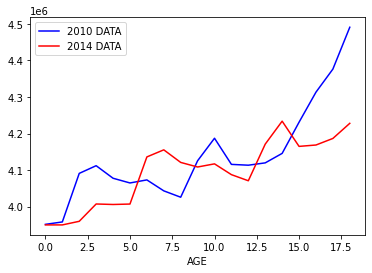

In [7]:
ax = df.plot.line(x="AGE", y="2010", label="2010 DATA", c="blue") # fill in the parameters
df.plot.line(x="AGE", y="2014", label="2014 DATA", c="red", ax=ax)

## Exercise 3. 

1. What is population for age = 9 for the 2010 census?
2. What is population for age = 9 for the 2014 census?
3. Is the portion of population over 9 years old increasing? decreasing? staying the same?

In [15]:
# your code here
print(type(df['AGE']==9))
all9YoData = df[df['AGE']==9]

print('Population for age = 9 for 2010 is:', all9YoData.loc[9,'2010'])

print('Population for age = 9 for 2014 is:', all9YoData.loc[9,'2010'])

total2010 = df['2010'].sum()
total2014 = df['2014'].sum()

p2010 = all9YoData.loc[9,'2010'] / total2010
p2014 = all9YoData.loc[9,'2014'] / total2014

if( p2010 < p2014):
    print('Increasing prop')
elif(p2010 > p2014):
    print('Deacreasing prop')
else:
    print('Proportionally staying the same')

<class 'pandas.core.series.Series'>
Population for age = 9 for 2010 is: 4125415
Population for age = 9 for 2014 is: 4125415
Increasing prop


### Bonus
Put the new histogram and the previous one next to each other and explain what you can infer by comparing them.